# EDA (Exploraory Data Analysis)
   - Exploratory data analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trend, patterns or to check assumptions with the help of statistical summary and graphical representation. 

**Steps involaved in EDA**

1. Describing the data
2. Data Cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformation 
6. Auto EDA


**Import Data and Data Description** 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Latest Material\Day 12 EDA\Datasets\data_clean.csv', index_col=0)

In [3]:
df.head()

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     67     5    1  2010    67       S
2   36.0    118.0   8.0     72     5    2  2010    72       C
3   12.0    149.0  12.6     74     5    3  2010    74      PS
4   18.0    313.0  11.5     62     5    4  2010    62       S
5    NaN      NaN  14.3     56     5    5  2010    56       S

In [4]:
df.describe()

Ozone     Solar.R        Wind         Day    Year        Temp
count  120.000000  151.000000  158.000000  158.000000   158.0  158.000000
mean    41.583333  185.403974    9.957595   16.006329  2010.0   77.727848
std     32.620709   88.723103    3.511261    8.997166     0.0    9.377877
min      1.000000    7.000000    1.700000    1.000000  2010.0   56.000000
25%     18.000000  119.000000    7.400000    8.000000  2010.0   72.000000
50%     30.500000  197.000000    9.700000   16.000000  2010.0   78.500000
75%     61.500000  257.000000   11.875000   24.000000  2010.0   84.000000
max    168.000000  334.000000   20.700000   31.000000  2010.0   97.000000

In [5]:
df.describe(include='object')

Temp C Month Weather
count     158   158     155
unique     41     6       3
top        81     9       S
freq       11    34      59

In [6]:
df.describe(include='all')

Ozone     Solar.R        Wind Temp C Month         Day    Year  \
count   120.000000  151.000000  158.000000    158   158  158.000000   158.0   
unique         NaN         NaN         NaN     41     6         NaN     NaN   
top            NaN         NaN         NaN     81     9         NaN     NaN   
freq           NaN         NaN         NaN     11    34         NaN     NaN   
mean     41.583333  185.403974    9.957595    NaN   NaN   16.006329  2010.0   
std      32.620709   88.723103    3.511261    NaN   NaN    8.997166     0.0   
min       1.000000    7.000000    1.700000    NaN   NaN    1.000000  2010.0   
25%      18.000000  119.000000    7.400000    NaN   NaN    8.000000  2010.0   
50%      30.500000  197.000000    9.700000    NaN   NaN   16.000000  2010.0   
75%      61.500000  257.000000   11.875000    NaN   NaN   24.000000  2010.0   
max     168.000000  334.000000   20.700000    NaN   NaN   31.000000  2010.0   

              Temp Weather  
count   158.000000     155  
unique         NaN       3  
top            NaN       S  
freq           NaN      59  
mean     77.727848     NaN  
std       9.377877     NaN  
min      56.000000     NaN  
25%      72.000000     NaN  
50%      78.500000     NaN  
75%      84.000000     NaN  
max      97.000000     NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


# Datatype Coversion

**There are two ways by which we can convert the data type of these two columns**
- By using replace method
- By using pandas build in functions

In [8]:
#Datatype conversion

df['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [9]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [10]:
#Replace method

df['Temp C'].replace('C',np.nan)

1      67
2      72
3      74
4      62
5      56
       ..
154    67
155    70
156    77
157    75
158    76
Name: Temp C, Length: 158, dtype: object

In [11]:
df['Month'].replace('May','5',inplace=True)

In [12]:
df['Month'].unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [13]:
df['Month']=df['Month'].astype(int)

In [14]:
df['Month'].dtype

dtype('int32')

In [15]:
#Using pandas built in functions

In [16]:
df['Temp C'].dtype

dtype('O')

In [17]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month        int32
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [18]:
df['Temp C']=pd.to_numeric(df['Temp C'], errors='coerce')

In [19]:
df['Temp C'].dtype

dtype('float64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   157 non-null    float64
 4   Month    158 non-null    int32  
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(1)
memory usage: 11.7+ KB


# Duplicates

In [21]:
#Print the duplicate values

df[df.duplicated()]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [22]:
#Get all the duplicated values
# 2 Approaches

In [23]:
df[df.duplicated(keep=False)]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3    75.0      9   28  2010    75       S
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [24]:
df[(df['Ozone']==14) & (df['Wind']==14.3) & (df['Day']==28)]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3    75.0      9   28  2010    75       S
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.duplicated().sum()

0

In [27]:
df[df.duplicated()]

Empty DataFrame
Columns: [Ozone, Solar.R, Wind, Temp C, Month, Day, Year, Temp, Weather]
Index: []

# Drop Columns
- There is one column which only has single different value. 
- We need to get rid of all the unnecessary columns or else it will be very complex data.

In [28]:
df.head(3)

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
1   41.0    190.0   7.4    67.0      5    1  2010    67       S
2   36.0    118.0   8.0    72.0      5    2  2010    72       C
3   12.0    149.0  12.6    74.0      5    3  2010    74      PS

In [29]:
df.drop(columns='Temp C', inplace=True)

In [30]:
df.head(1)

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
1   41.0    190.0   7.4      5    1  2010    67       S

# Rename the columns

In [31]:
df.rename(columns={'Solar.R': 'Solar'}, inplace=True)

In [32]:
df.head(1)

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1   41.0  190.0   7.4      5    1  2010    67       S

# Missing value imputation
- In dataset, Missing data or missing value occure when no data value is stored for the variable in an observation.
- Missing data are common occurence and can have a significance effect on the conclusions that can be drawn from the data.
- if we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crusial step in EDA.
- Missing values can appear for sevaral reasons like: 
    - Incomplete data entry
    - Issues with machines
    - Improper handling of data 
    - And many more

In [33]:
#Checking null values

In [34]:
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [35]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

sns.set_style('darkgrid')

<AxesSubplot:>

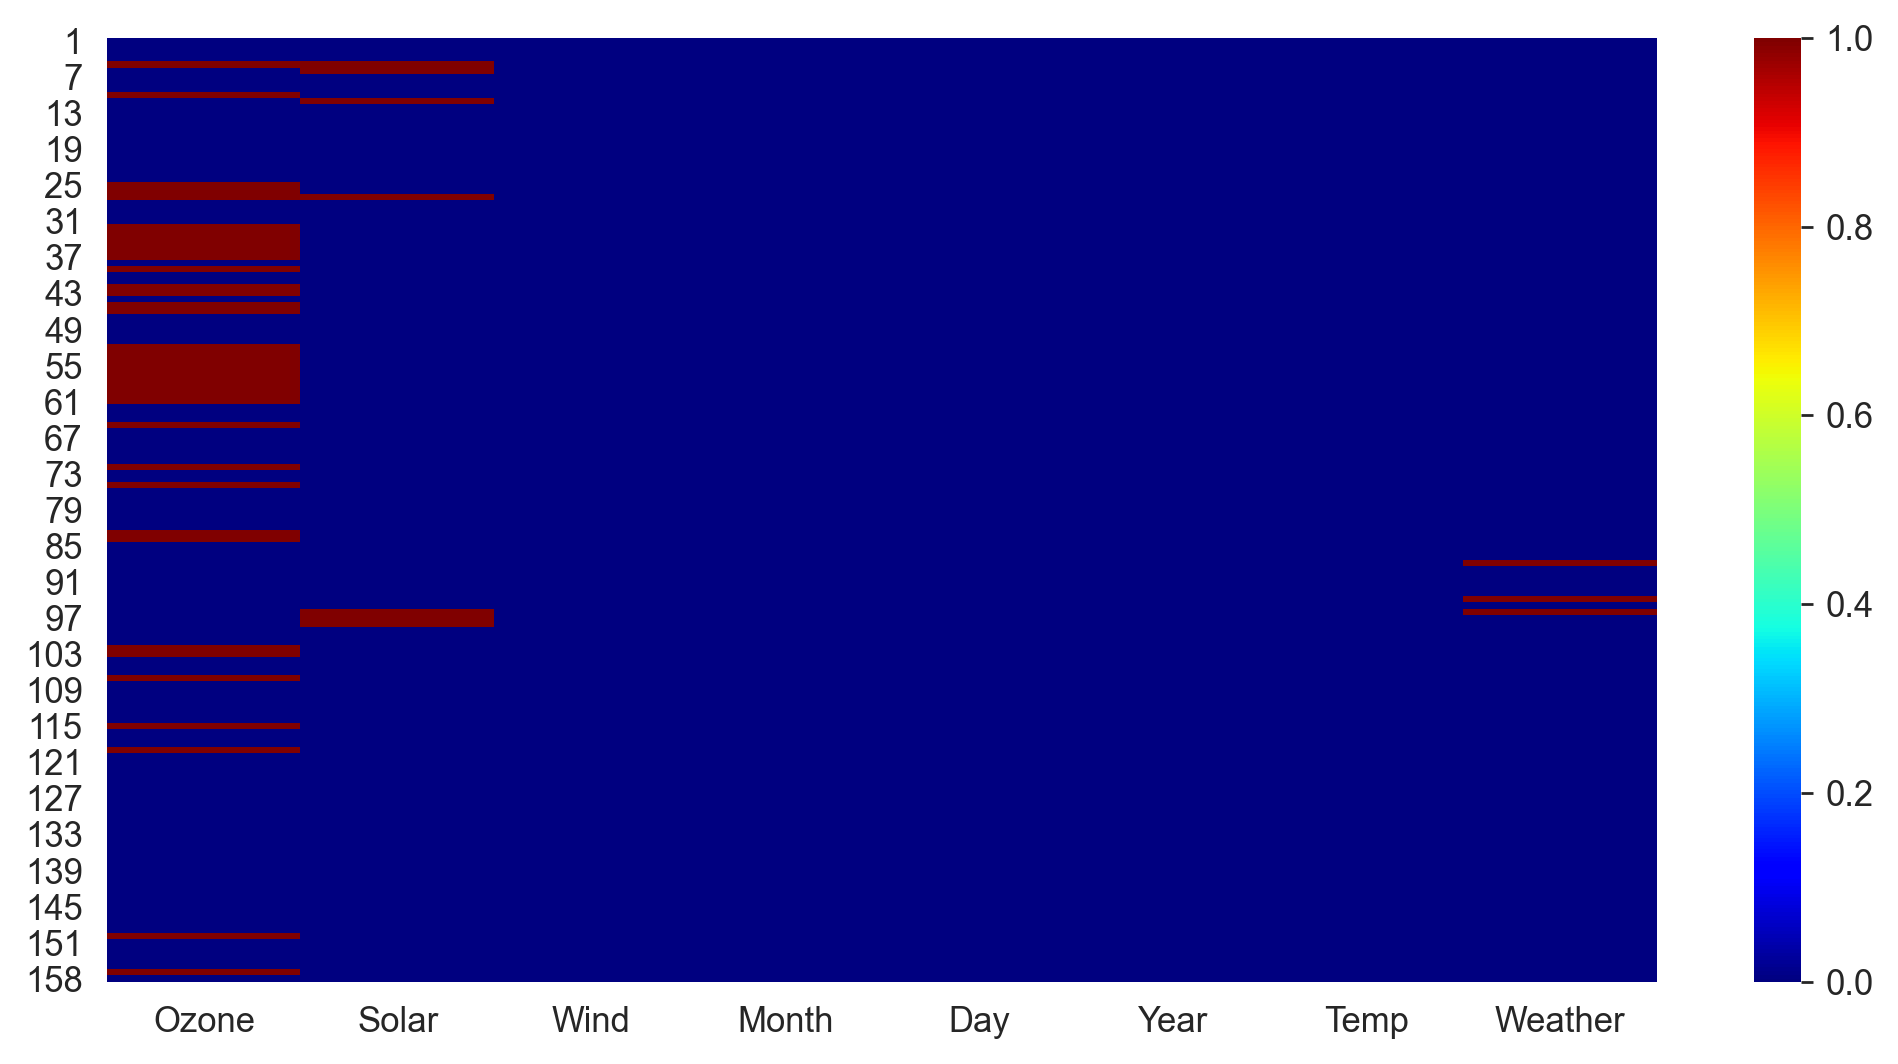

In [36]:
sns.heatmap(df.isna(), cmap='jet')

# Rules for missing value imputation

1. If the null values are less than 3% you can drop those observations.
2. If the null values are between 4 to 40% then Fill those null values.
3. If the null values are more than 50% then drop the column

In [37]:
 #Calculate the percentage of missing values in each column.

In [38]:
null_val= df.isnull().sum()/len(df)*100

In [39]:
null_val

Ozone      24.203822
Solar       4.458599
Wind        0.000000
Month       0.000000
Day         0.000000
Year        0.000000
Temp        0.000000
Weather     1.910828
dtype: float64

In [40]:
median= df['Ozone'].median()

In [41]:
df['Ozone'].fillna(median,inplace=True)

In [42]:
df.isna().sum()

Ozone      0
Solar      7
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [43]:
df['Solar'].fillna(df['Solar'].median(),inplace=True)

In [44]:
df.isna().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [45]:
df['Weather'].mode()

0    S
dtype: object

In [46]:
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

In [47]:
df.isna().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

# Outlier detection

- There are multiple approaches to detect outliers in the datasets.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [48]:
df.describe()

Ozone       Solar        Wind       Month         Day    Year  \
count  157.000000  157.000000  157.000000  157.000000  157.000000   157.0   
mean    39.197452  185.974522    9.929936    7.019108   15.929936  2010.0   
std     28.781992   87.044783    3.505188    1.434338    8.974404     0.0   
min      1.000000    7.000000    1.700000    5.000000    1.000000  2010.0   
25%     21.000000  127.000000    7.400000    6.000000    8.000000  2010.0   
50%     31.000000  199.000000    9.700000    7.000000   16.000000  2010.0   
75%     45.000000  255.000000   11.500000    8.000000   24.000000  2010.0   
max    168.000000  334.000000   20.700000    9.000000   31.000000  2010.0   

             Temp  
count  157.000000  
mean    77.745223  
std      9.405334  
min     56.000000  
25%     72.000000  
50%     79.000000  
75%     84.000000  
max     97.000000

In [49]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

sns.set_style('darkgrid')

(array([28., 74., 21.,  9., 11.,  7.,  3.,  2.,  1.,  1.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <BarContainer object of 10 artists>)

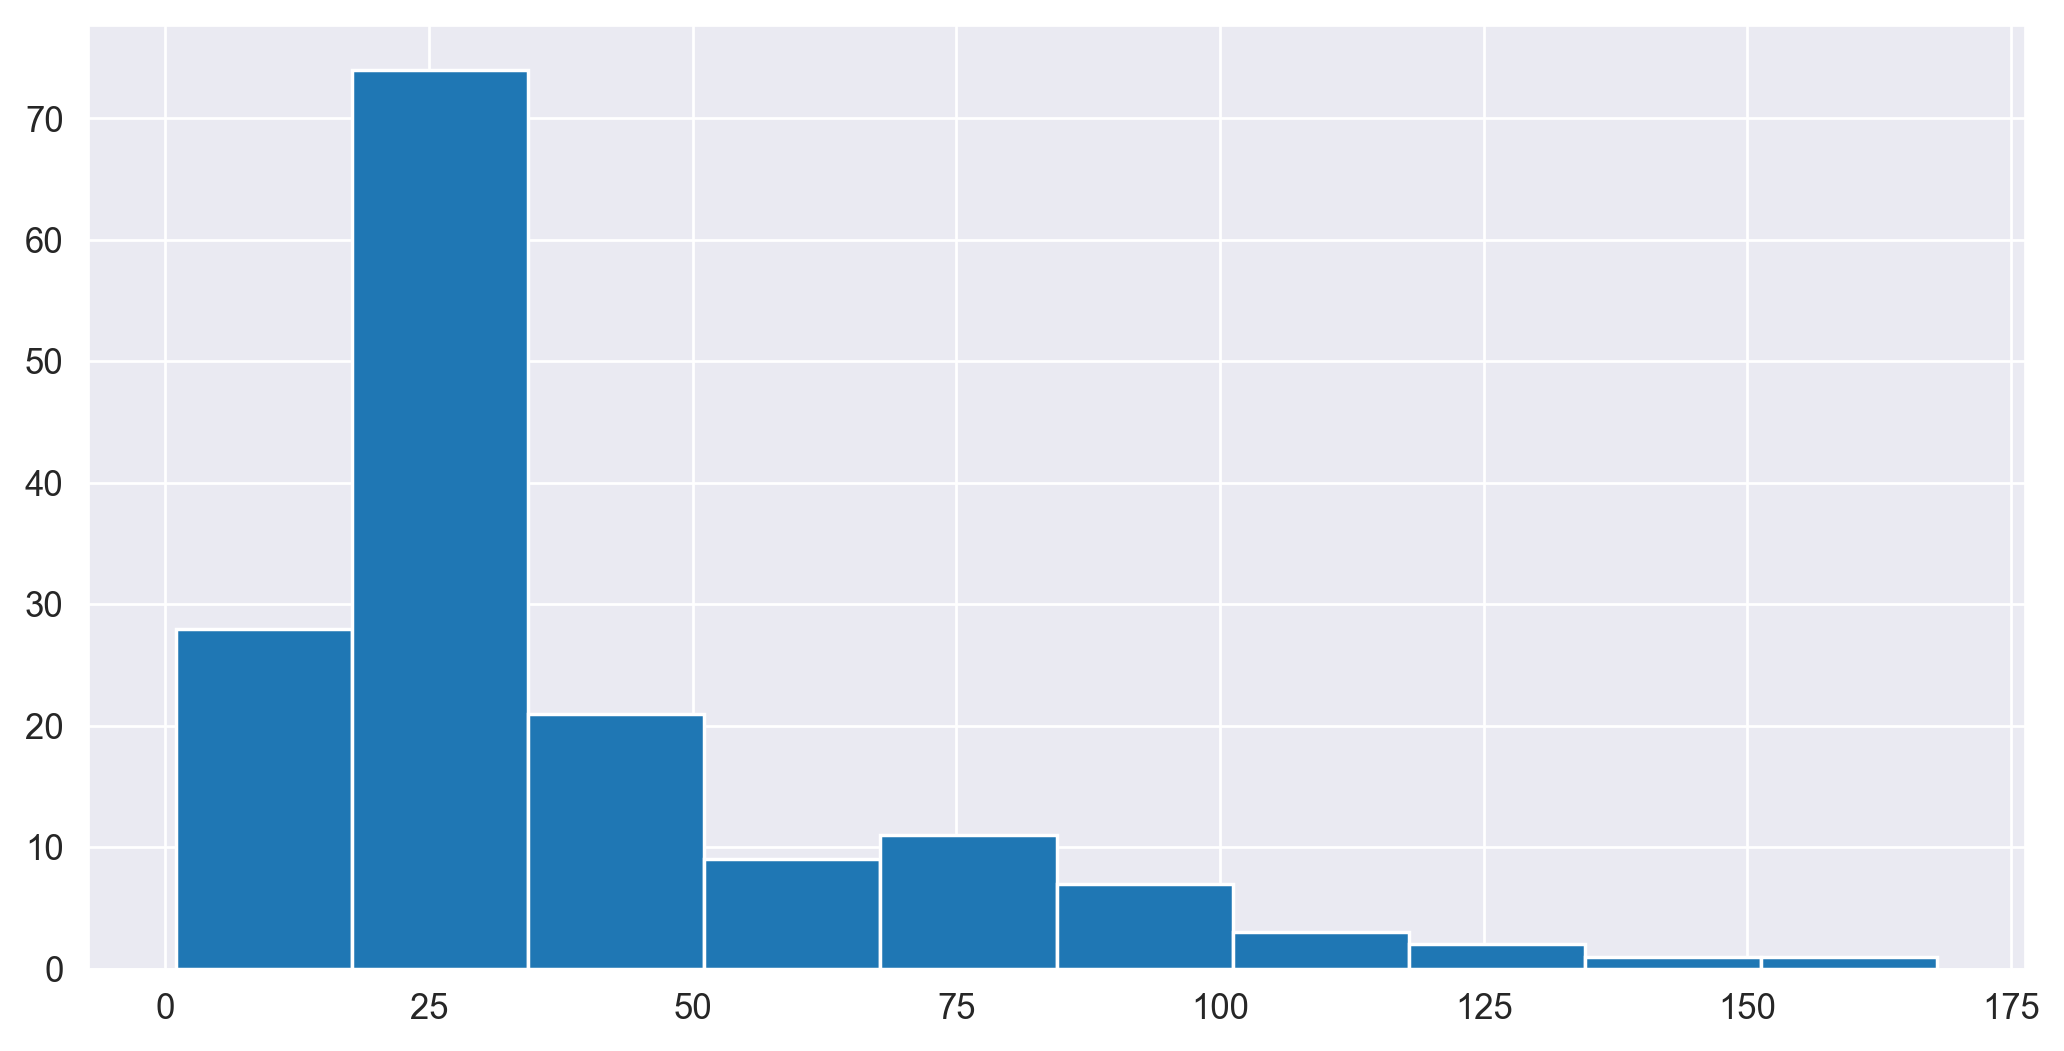

In [50]:
plt.hist(df['Ozone'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25119d853d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25119d85a90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x25119d85040>],
 'medians': [<matplotlib.lines.Line2D at 0x25119d92190>],
 'fliers': [<matplotlib.lines.Line2D at 0x25119d92850>],
 'means': [<matplotlib.lines.Line2D at 0x25119d924f0>]}

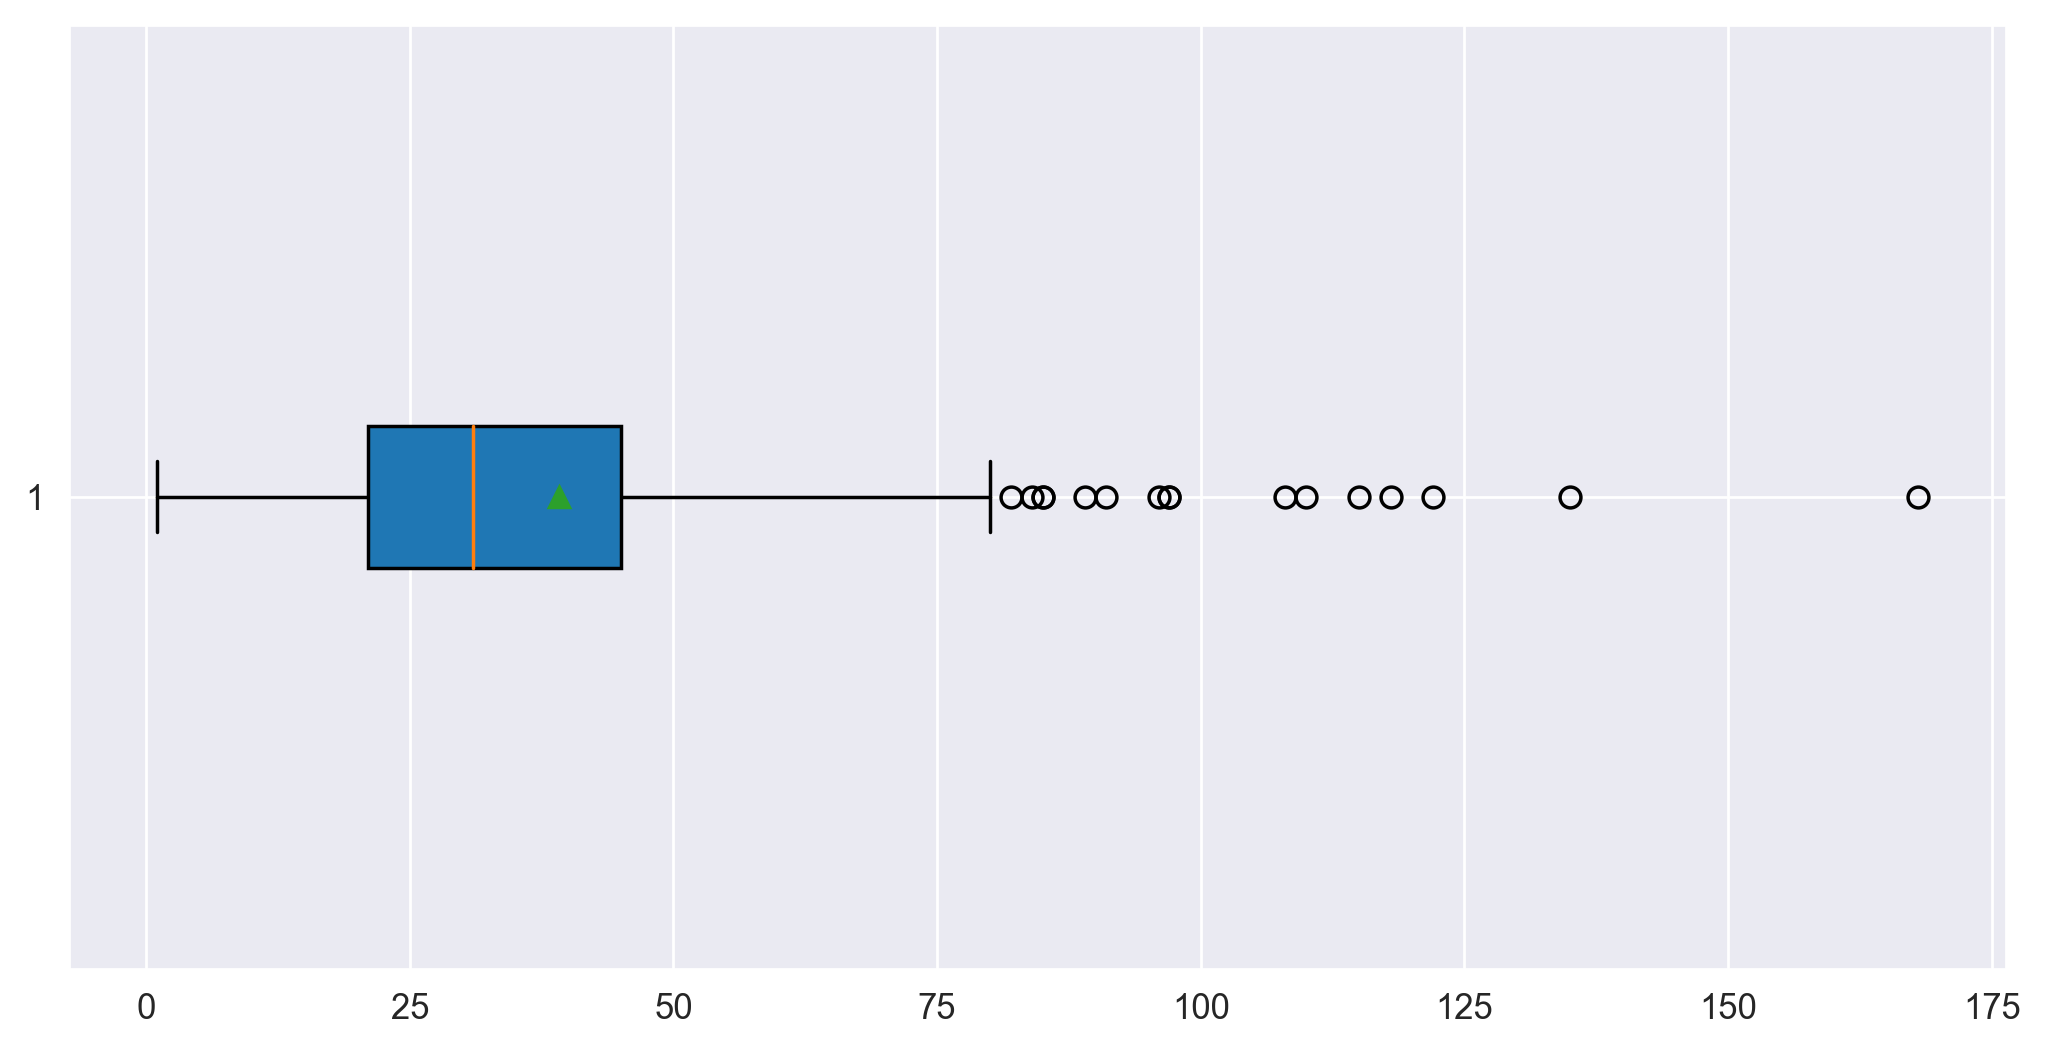

In [51]:
plt.boxplot(df['Ozone'], vert=False, patch_artist=True, showmeans=True)

In [52]:
df[df['Ozone']>77]

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
30   115.0  223.0   5.7      5   30  2010    79       C
62   135.0  269.0   4.1      7    1  2010    84       S
69    97.0  267.0   6.3      7    8  2010    92      PS
70    97.0  272.0   5.7      7    9  2010    92       C
71    85.0  175.0   7.4      7   10  2010    89      PS
80    79.0  187.0   5.1      7   19  2010    87      PS
85    80.0  294.0   8.6      7   24  2010    86      PS
86   108.0  223.0   8.0      7   25  2010    85      PS
89    82.0  213.0   7.4      7   28  2010    88       S
96    78.0  199.0   6.9      8    4  2010    86       S
99   122.0  255.0   4.0      8    7  2010    89       C
100   89.0  229.0  10.3      8    8  2010    90      PS
101  110.0  207.0   8.0      8    9  2010    90       C
117  168.0  238.0   3.4      8   25  2010    81      PS
121  118.0  225.0   2.3      8   29  2010    94       S
122   84.0  237.0   6.3      8   30  2010    96       S
123   85.0  188.0   6.3      8   31  2010    94       C
124   96.0  167.0   6.9      9    1  2010    91       C
125   78.0  197.0   5.1      9    2  2010    92      PS
127   91.0  189.0   4.6      9    4  2010    93      PS

{'whiskers': [<matplotlib.lines.Line2D at 0x25119de6970>,
 'caps': [<matplotlib.lines.Line2D at 0x25119df3070>,
 'boxes': [<matplotlib.lines.Line2D at 0x25119de6610>,
 'medians': [<matplotlib.lines.Line2D at 0x25119df3730>,
 'fliers': [<matplotlib.lines.Line2D at 0x25119df3a90>,
 'means': []}

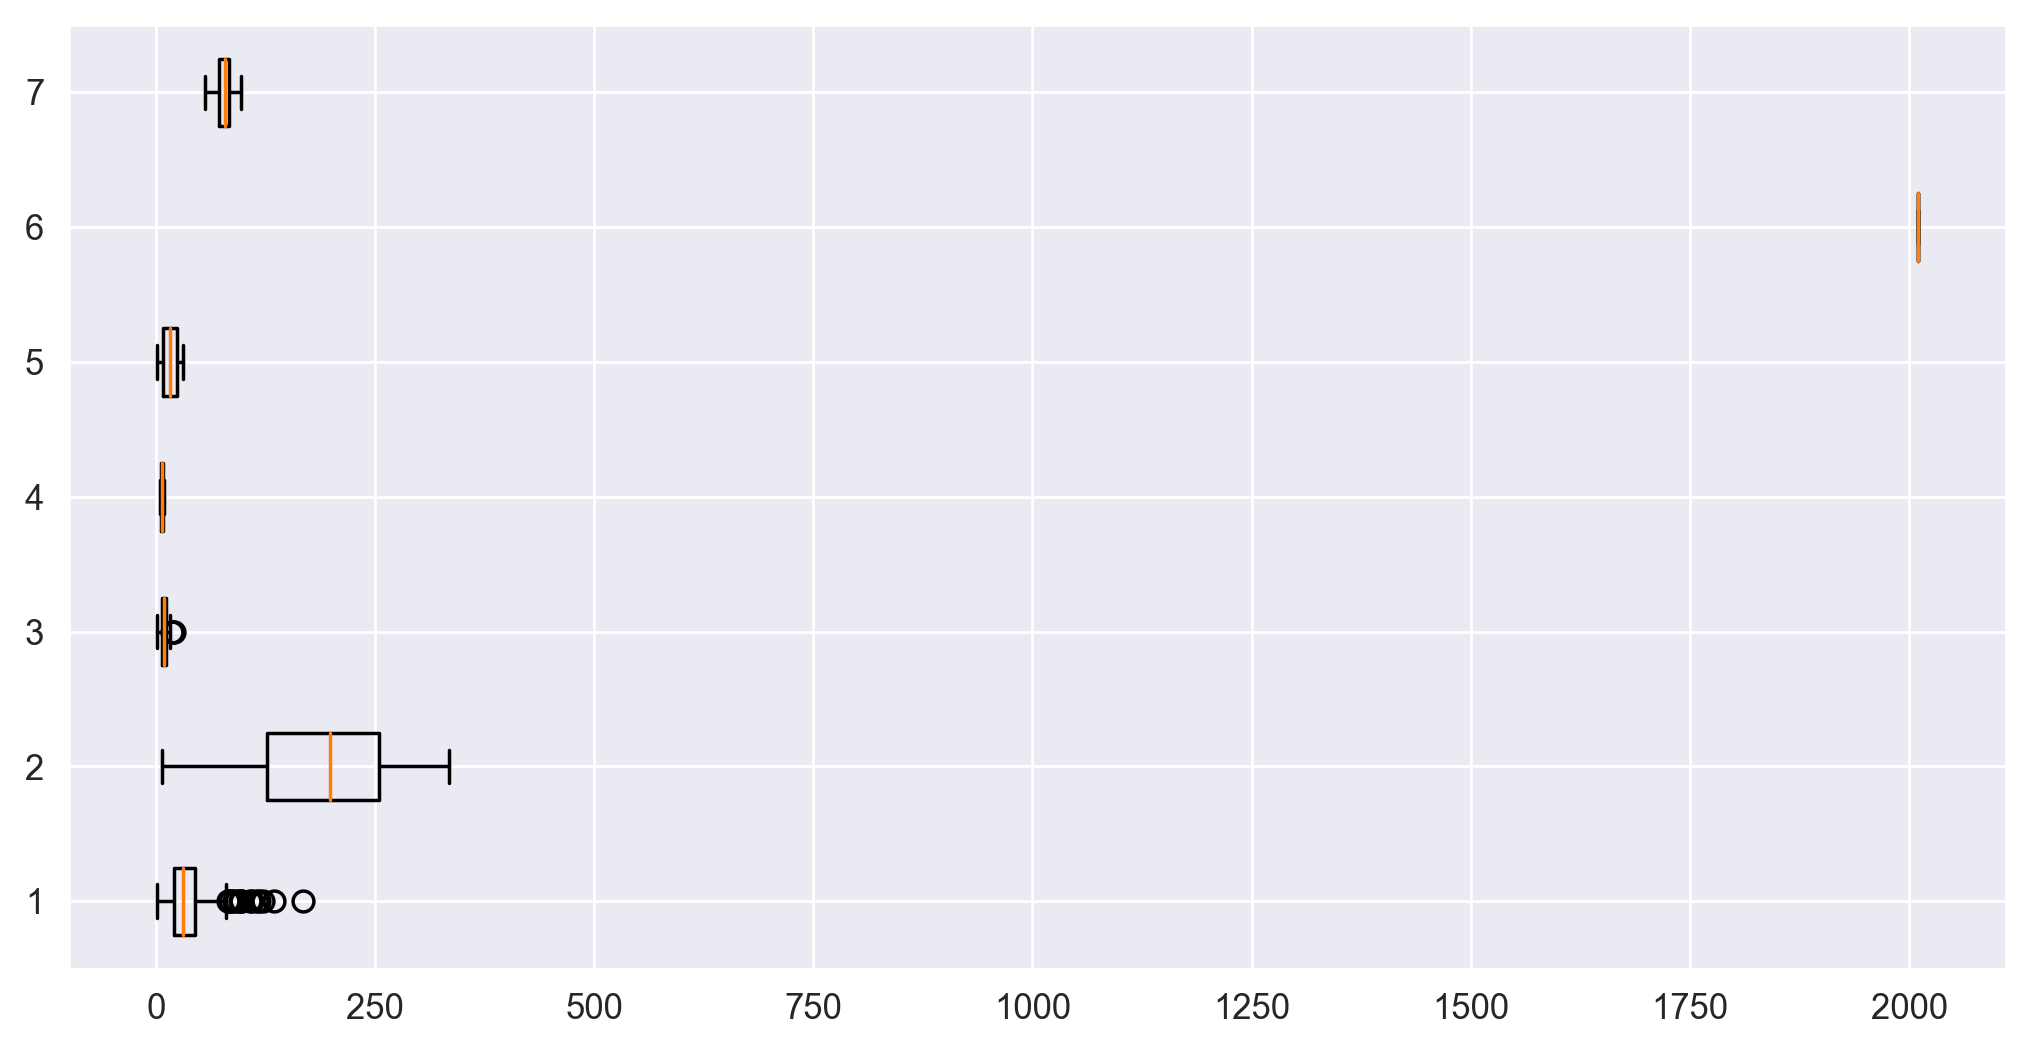

In [53]:
plt.boxplot(df.drop(columns=['Weather']),vert=False)

# Scatter Plot and Correlation

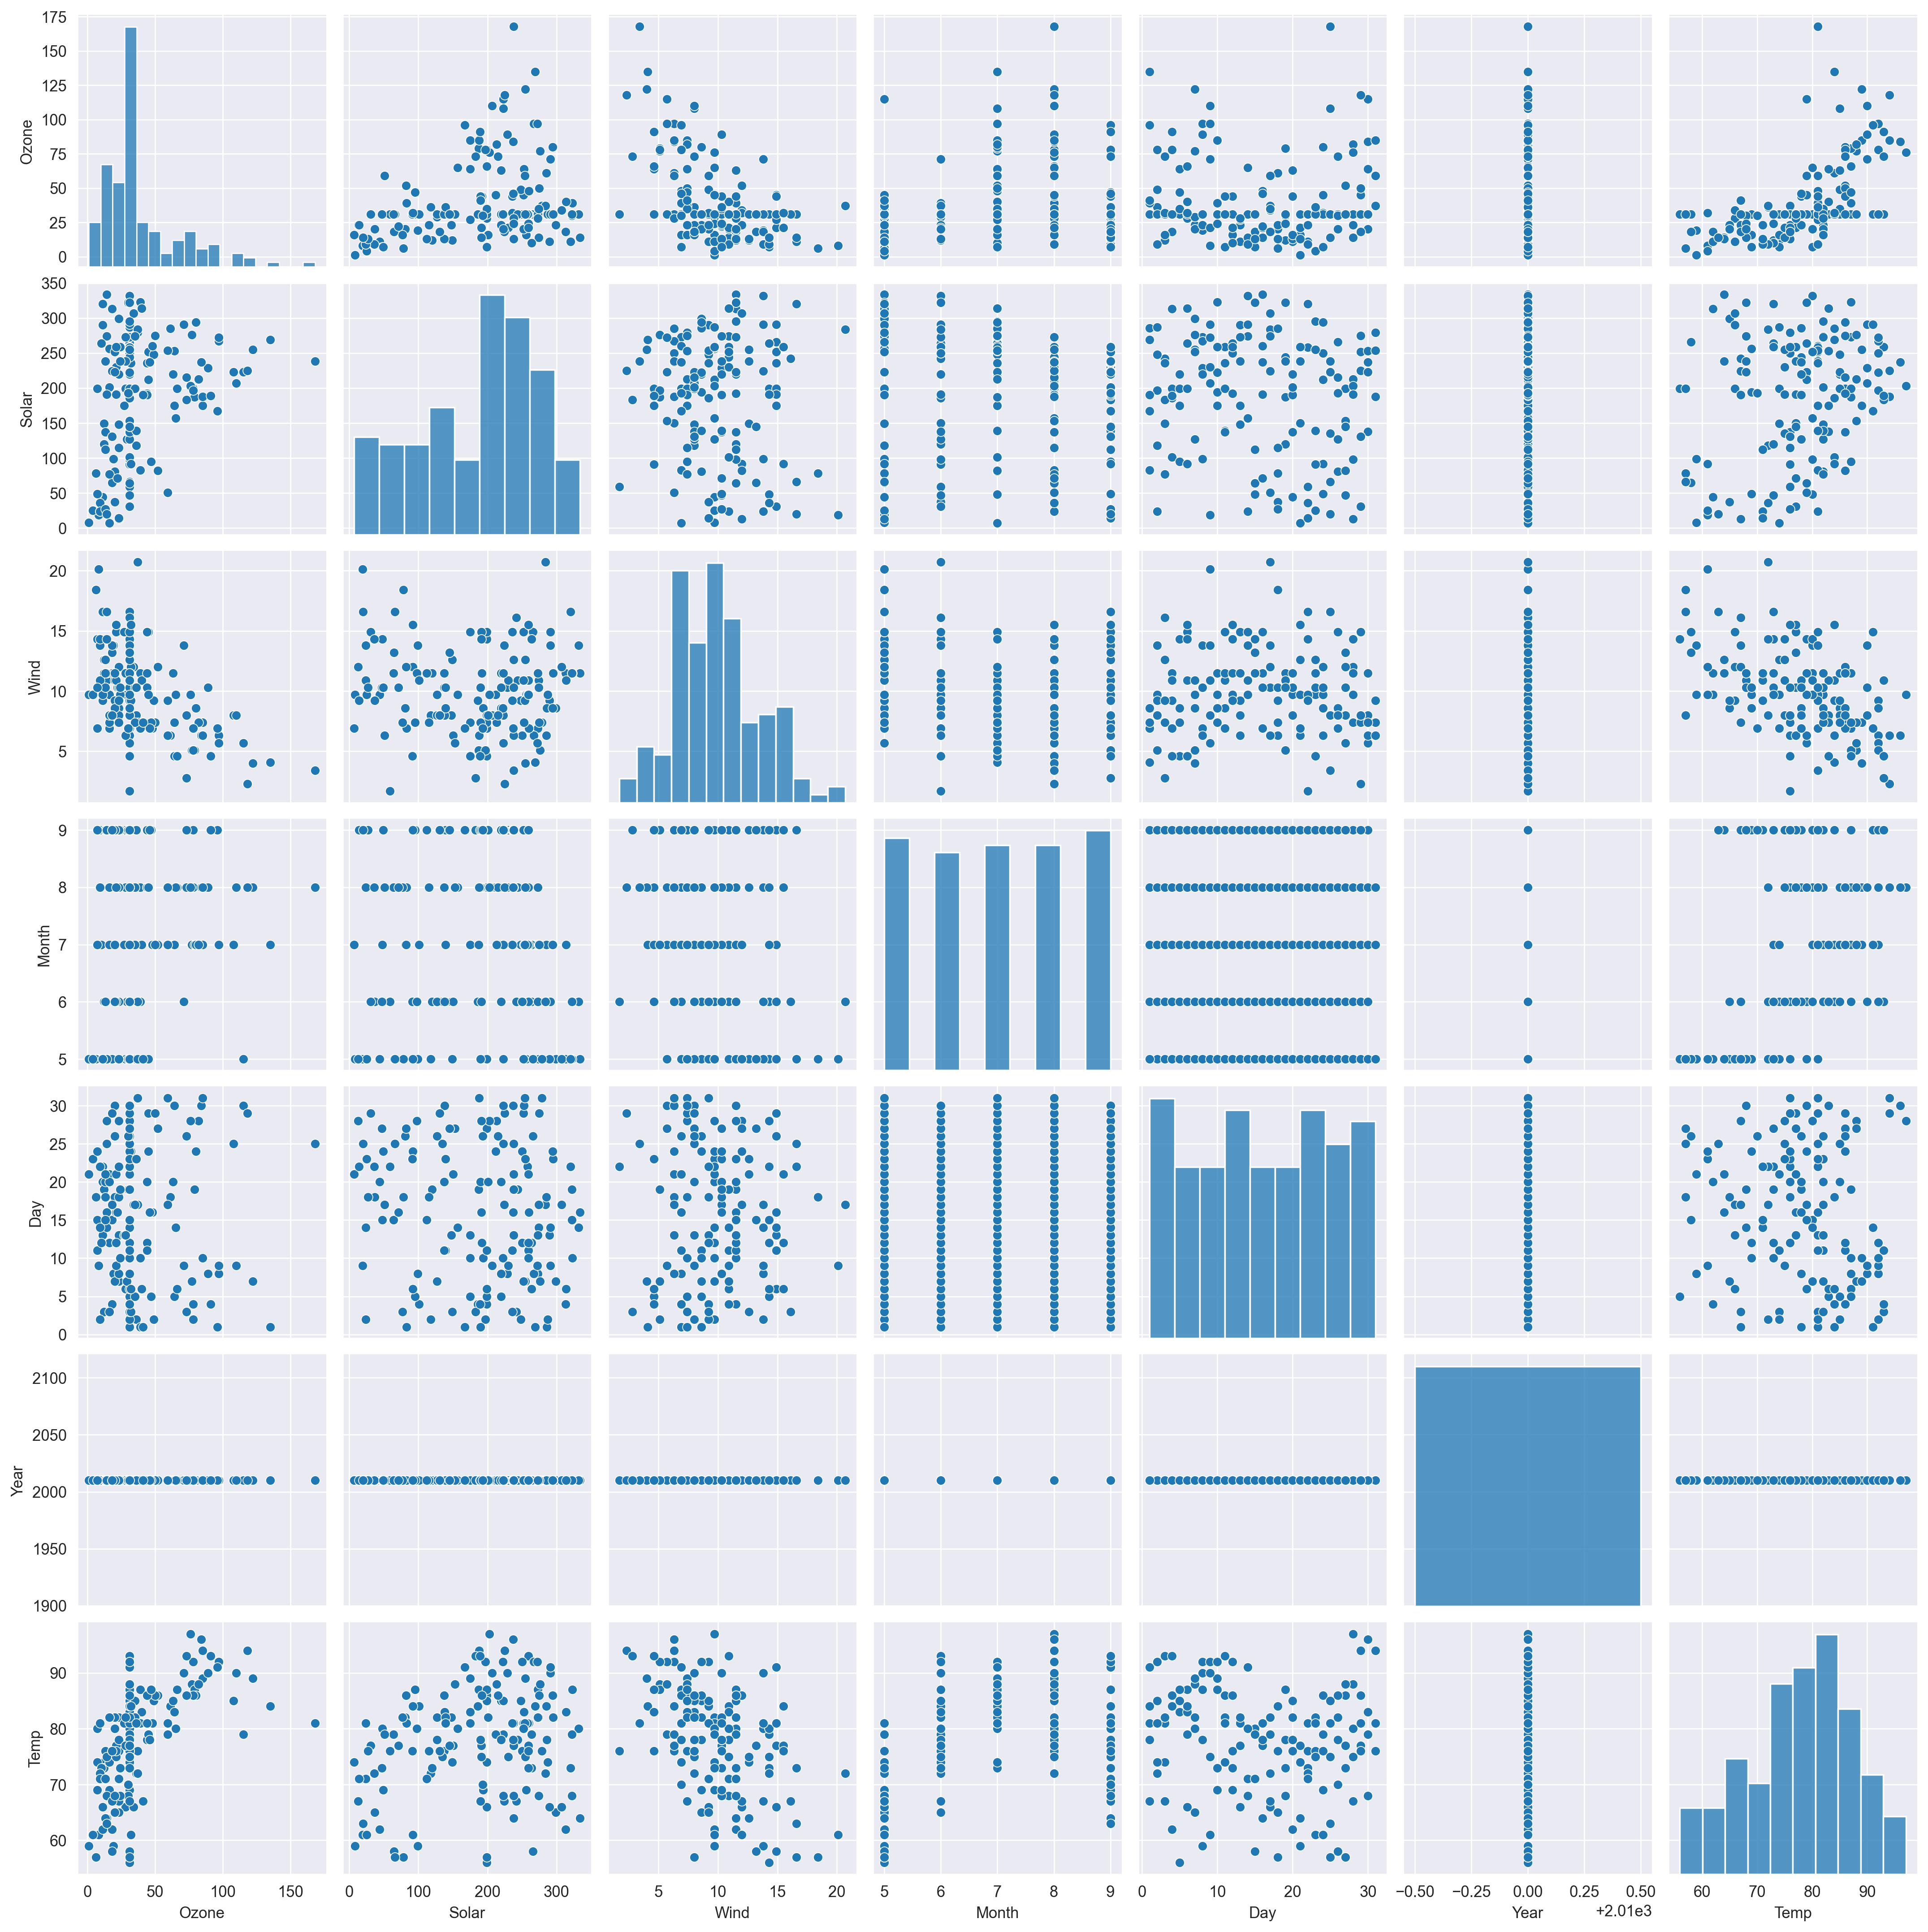

In [54]:
sns.pairplot(df)

C:\Users\HP\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2010.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\HP\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 2010.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\HP\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 2010.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


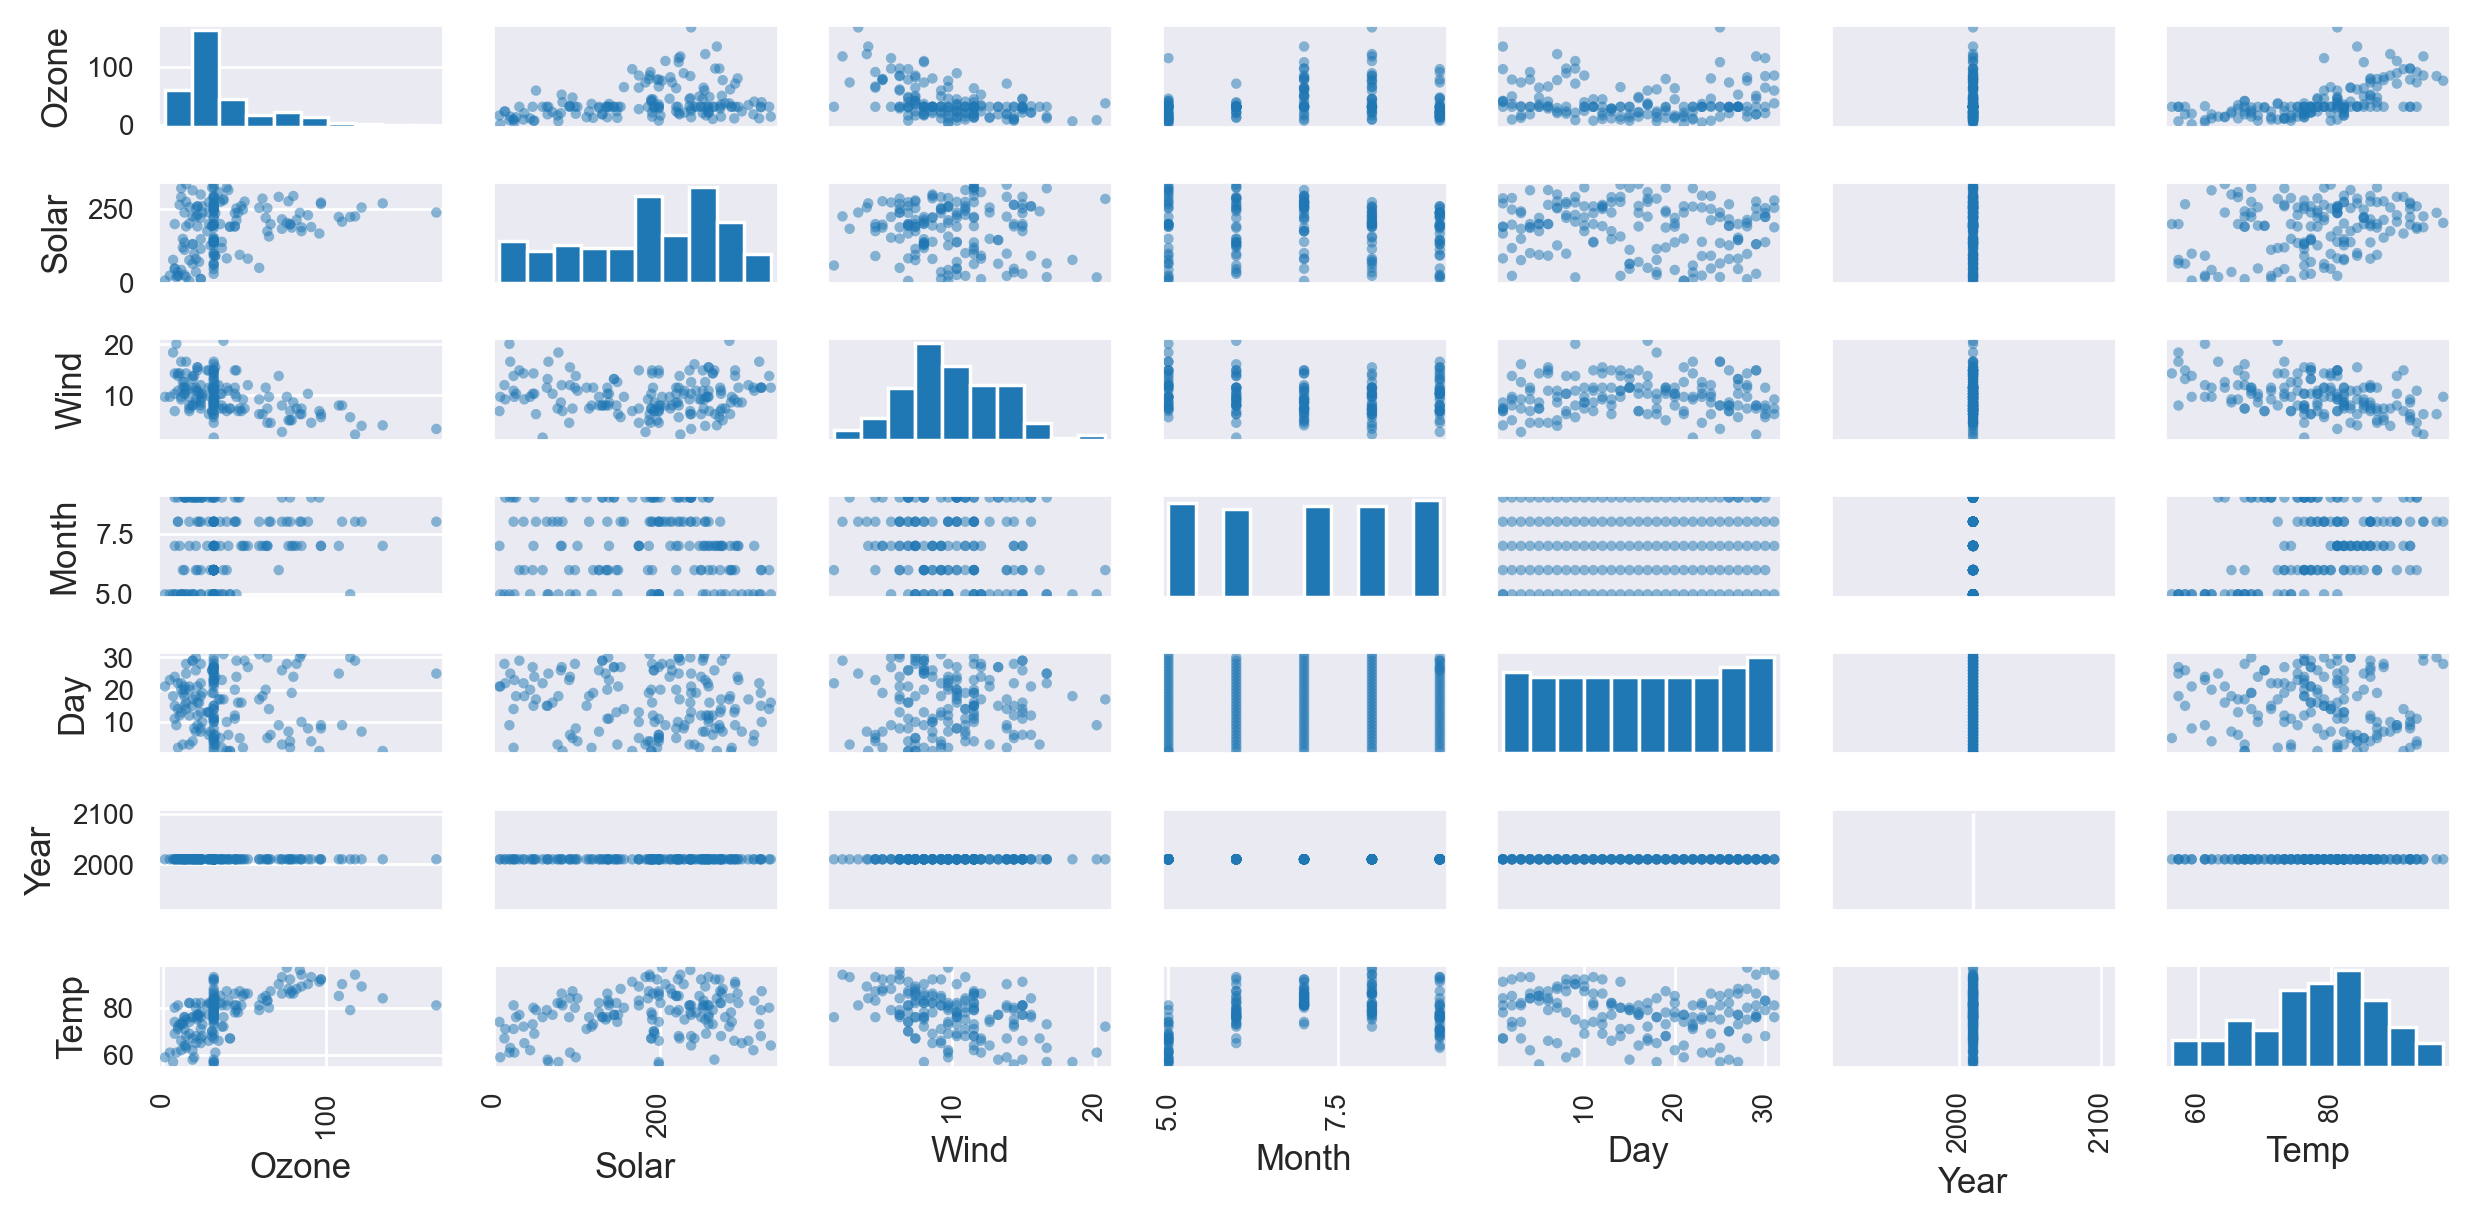

In [55]:
pd.plotting.scatter_matrix(df)
plt.tight_layout()

In [56]:
df.corr()

Ozone     Solar      Wind     Month       Day  Year      Temp
Ozone  1.000000  0.297561 -0.523738  0.171488 -0.031737   NaN  0.597087
Solar  0.297561  1.000000 -0.057709 -0.083788 -0.156243   NaN  0.256994
Wind  -0.523738 -0.057709  1.000000 -0.170328  0.029900   NaN -0.441228
Month  0.171488 -0.083788 -0.170328  1.000000  0.041438   NaN  0.408060
Day   -0.031737 -0.156243  0.029900  0.041438  1.000000   NaN -0.122787
Year        NaN       NaN       NaN       NaN       NaN   NaN       NaN
Temp   0.597087  0.256994 -0.441228  0.408060 -0.122787   NaN  1.000000

<AxesSubplot:>

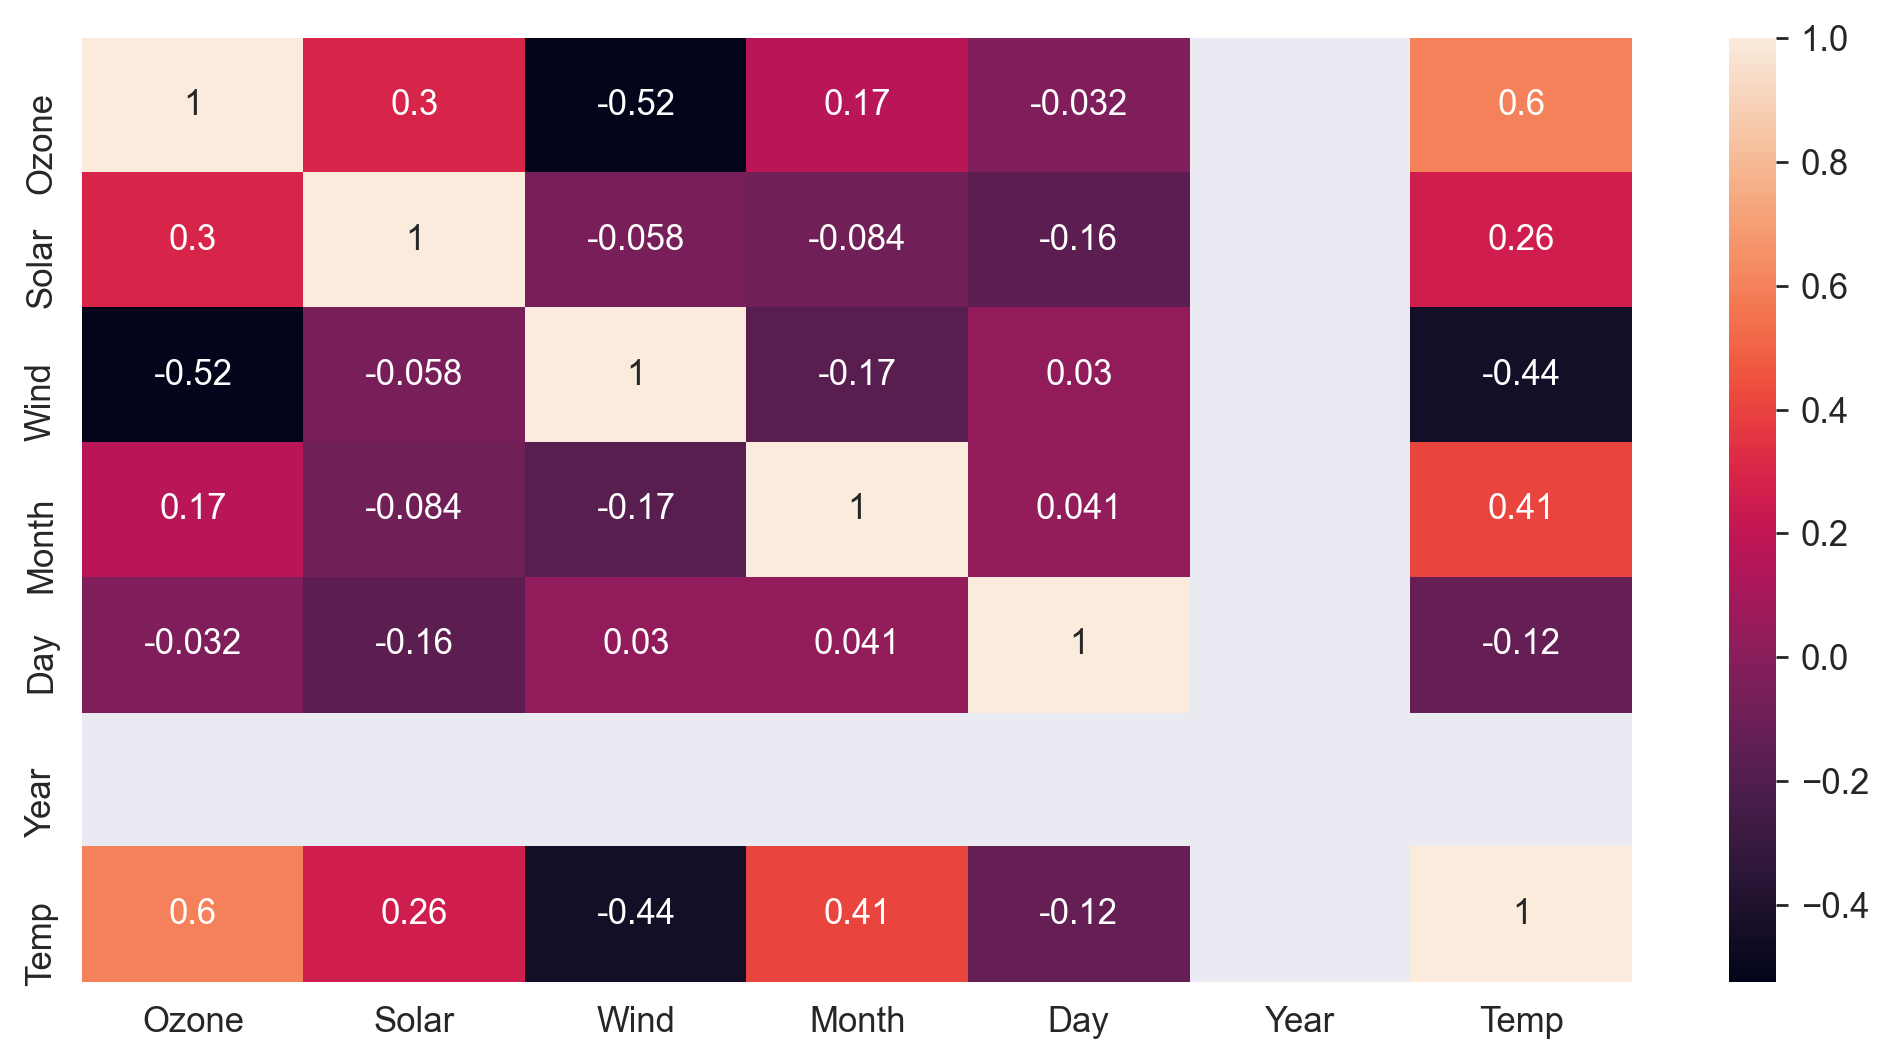

In [57]:
sns.heatmap(df.corr(), annot=True)

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convent all the catagorical columns into numerical.

In [58]:
#Encoding using pandas dummy function.

In [59]:
df.head(2)

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1   41.0  190.0   7.4      5    1  2010    67       S
2   36.0  118.0   8.0      5    2  2010    72       C

In [60]:
df=pd.get_dummies(data=df, columns=['Weather'])

In [61]:
df

Ozone  Solar  Wind  Month  Day  Year  Temp  Weather_C  Weather_PS  \
1     41.0  190.0   7.4      5    1  2010    67          0           0   
2     36.0  118.0   8.0      5    2  2010    72          1           0   
3     12.0  149.0  12.6      5    3  2010    74          0           1   
4     18.0  313.0  11.5      5    4  2010    62          0           0   
5     31.0  199.0  14.3      5    5  2010    56          0           0   
..     ...    ...   ...    ...  ...   ...   ...        ...         ...   
153   20.0  223.0  11.5      9   30  2010    68          0           0   
154   41.0  190.0   7.4      5    1  2010    67          1           0   
155   30.0  193.0   6.9      9   26  2010    70          0           1   
156   31.0  145.0  13.2      9   27  2010    77          0           0   
158   18.0  131.0   8.0      9   29  2010    76          1           0   

     Weather_S  
1            1  
2            0  
3            0  
4            1  
5            1  
..         ...  
153          1  
154          0  
155          0  
156          1  
158          0  

[157 rows x 10 columns]

# Scaling the data
   - Normalization
        - Scale value within the range of 0 to 1.
   - Standerdization
        - Uses Z-Score scaling
        - Scale value in such a way that the mean = 0 and standerd deviation = 1.
        

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [63]:
#Normalization

mn=MinMaxScaler()

In [64]:
df1=mn.fit_transform(df)
df1

array([[0.23952096, 0.55963303, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.20958084, 0.33944954, 0.33157895, ..., 1.        , 0.        ,
        0.        ],
       [0.06586826, 0.43425076, 0.57368421, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.17365269, 0.56880734, 0.27368421, ..., 0.        , 1.        ,
        0.        ],
       [0.17964072, 0.42201835, 0.60526316, ..., 0.        , 0.        ,
        1.        ],
       [0.10179641, 0.37920489, 0.33157895, ..., 1.        , 0.        ,
        0.        ]])

In [65]:
df1=mn.fit_transform(df)
df1= pd.DataFrame(df1, columns=df.columns)
df1

Ozone     Solar      Wind  Month       Day  Year      Temp  Weather_C  \
0    0.239521  0.559633  0.300000    0.0  0.000000   0.0  0.268293        0.0   
1    0.209581  0.339450  0.331579    0.0  0.033333   0.0  0.390244        1.0   
2    0.065868  0.434251  0.573684    0.0  0.066667   0.0  0.439024        0.0   
3    0.101796  0.935780  0.515789    0.0  0.100000   0.0  0.146341        0.0   
4    0.179641  0.587156  0.663158    0.0  0.133333   0.0  0.000000        0.0   
..        ...       ...       ...    ...       ...   ...       ...        ...   
152  0.113772  0.660550  0.515789    1.0  0.966667   0.0  0.292683        0.0   
153  0.239521  0.559633  0.300000    0.0  0.000000   0.0  0.268293        1.0   
154  0.173653  0.568807  0.273684    1.0  0.833333   0.0  0.341463        0.0   
155  0.179641  0.422018  0.605263    1.0  0.866667   0.0  0.512195        0.0   
156  0.101796  0.379205  0.331579    1.0  0.933333   0.0  0.487805        1.0   

     Weather_PS  Weather_S  
0           0.0        1.0  
1           0.0        0.0  
2           1.0        0.0  
3           0.0        1.0  
4           0.0        1.0  
..          ...        ...  
152         0.0        1.0  
153         0.0        0.0  
154         1.0        0.0  
155         0.0        1.0  
156         0.0        0.0  

[157 rows x 10 columns]

In [66]:
df1['Ozone'].min()

0.0

In [67]:
df1['Ozone'].max()

1.0000000000000002

In [68]:
sc= StandardScaler()

In [69]:
df2=pd.DataFrame(sc.fit_transform(df), columns=df.columns)
df2

Ozone     Solar      Wind     Month       Day  Year      Temp  \
0    0.062828  0.046394 -0.724079 -1.412198 -1.668937   0.0 -1.146116   
1   -0.111448 -0.783413 -0.552356 -1.412198 -1.557152   0.0 -0.612802   
2   -0.947971 -0.426135  0.764184 -1.412198 -1.445367   0.0 -0.399476   
3   -0.738840  1.463982  0.449359 -1.412198 -1.333583   0.0 -1.679431   
4   -0.285723  0.150120  1.250731 -1.412198 -1.221798   0.0 -2.319408   
..        ...       ...       ...       ...       ...   ...       ...   
152 -0.669130  0.426722  0.449359  1.385469  1.572816   0.0 -1.039454   
153  0.062828  0.046394 -0.724079 -1.412198 -1.668937   0.0 -1.146116   
154 -0.320578  0.080969 -0.867181  1.385469  1.125678   0.0 -0.826128   
155 -0.285723 -0.472236  0.935906  1.385469  1.237462   0.0 -0.079488   
156 -0.738840 -0.633587 -0.552356  1.385469  1.461032   0.0 -0.186150   

     Weather_C  Weather_PS  Weather_S  
0    -0.673575   -0.653661    1.25450  
1     1.484615   -0.653661   -0.79713  
2    -0.673575    1.529845   -0.79713  
3    -0.673575   -0.653661    1.25450  
4    -0.673575   -0.653661    1.25450  
..         ...         ...        ...  
152  -0.673575   -0.653661    1.25450  
153   1.484615   -0.653661   -0.79713  
154  -0.673575    1.529845   -0.79713  
155  -0.673575   -0.653661    1.25450  
156   1.484615   -0.653661   -0.79713  

[157 rows x 10 columns]

In [70]:
df2['Ozone'].mean()

-1.4142968466562504e-17

In [71]:
df2['Ozone'].std()

1.0032000081789556

# Speed up the EDA process

In [72]:
!pip install pandas-profiling==3.1.0 
!pip install sweetviz

In [75]:
import sweetviz as sv
import pandas_profiling as pp 

In [76]:
df.head(2)

Ozone  Solar  Wind  Month  Day  Year  Temp  Weather_C  Weather_PS  \
1   41.0  190.0   7.4      5    1  2010    67          0           0   
2   36.0  118.0   8.0      5    2  2010    72          1           0   

   Weather_S  
1          1  
2          0

In [78]:
EDA_Report= pp.ProfileReport(df, title='Pandas Profiling Report',
                            vars= {'num': {'low_catagorical_threshold':0}})
EDA_Report

In [81]:
EDA_Report.to_file(output_file='EDAReport.html')

In [86]:
Sweet_Report=sv.analyze(df)
Sweet_Report

In [88]:
Sweet_Report.show_html('EDA1Report.html')

Report EDA1Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
